In [14]:
# baseline CNN Model

import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist


# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_split=0.2, verbose=2,
          epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
240/240 - 3s - 14ms/step - accuracy: 0.9119 - loss: 0.3004 - val_accuracy: 0.9713 - val_loss: 0.1041
Epoch 2/10
240/240 - 3s - 13ms/step - accuracy: 0.9731 - loss: 0.0895 - val_accuracy: 0.9795 - val_loss: 0.0704
Epoch 3/10
240/240 - 3s - 13ms/step - accuracy: 0.9820 - loss: 0.0601 - val_accuracy: 0.9839 - val_loss: 0.0571
Epoch 4/10
240/240 - 3s - 12ms/step - accuracy: 0.9854 - loss: 0.0472 - val_accuracy: 0.9851 - val_loss: 0.0496
Epoch 5/10
240/240 - 3s - 12ms/step - accuracy: 0.9883 - loss: 0.0386 - val_accuracy: 0.9862 - val_loss: 0.0469
Epoch 6/10
240/240 - 3s - 12ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9868 - val_loss: 0.0485
Epoch 7/10
240/240 - 3s - 12ms/step - accuracy: 0.9915 - loss: 0.0279 - val_accuracy: 0.9865 - val_loss: 0.0441
Epoch 8/10
240/240 - 3s - 12ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9871 - val_loss: 0.0469
Epoch 9/10
240/240 - 3s - 12ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9865 - val_loss:

In [9]:
scores

[0.041485268622636795, 0.9883999824523926]

In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [20]:
# load the CIFAR-100 DATASET
(ds_train, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/sohengkhiong/tensorflow_datasets/cifar100/incomplete.LS56Z3_3.0.2/cifar100-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/sohengkhiong/tensorflow_datasets/cifar100/incomplete.LS56Z3_3.0.2/cifar100-test.tfrecord*...:…

Dataset cifar100 downloaded and prepared to /Users/sohengkhiong/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


In [21]:
# Preprocess the data (convert to float32 and batch)
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)


Original Data Examples:


2025-06-05 11:11:47.484043: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-06-05 11:11:47.513325: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-06-05 11:11:47.515318: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


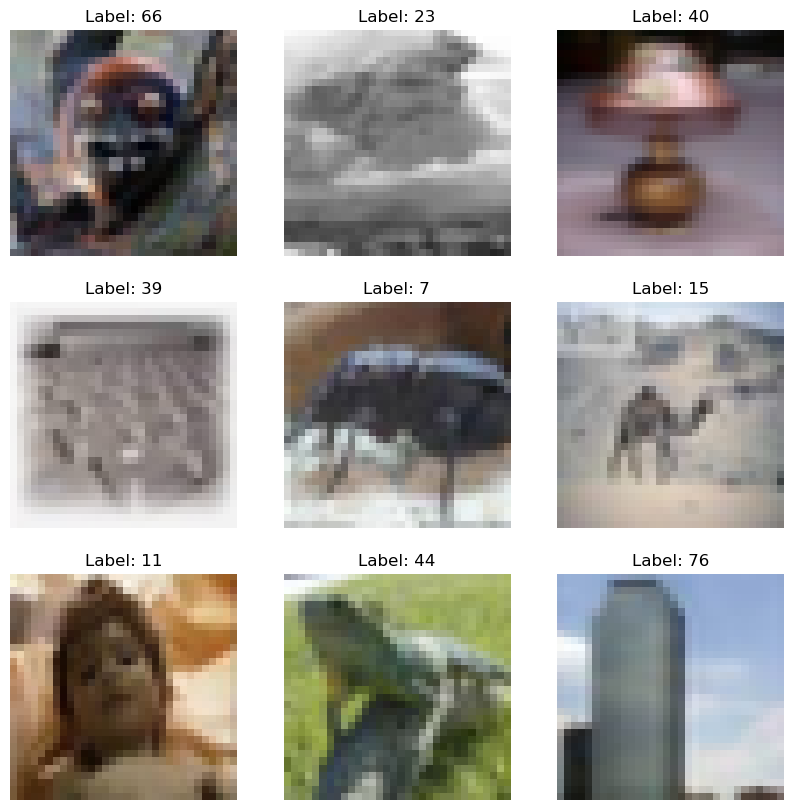

In [22]:
# Display some images from the dataset
print("Original Data Examples:")
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(1).unbatch().take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image) #CIFAR -100 IMAGES ARE COLOR
    plt.title(f'Label: {label.numpy()}') # NOTE: Labels are coarse labels in CIFAR-100
    plt.axis('off')
plt.show()

# Step 2:
A basic CNN that is being trained on the CIFAR-100 dataset

In [24]:
# Define a simple CNN model for CIFAR-100
def build_model_cifar100():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='softmax'))  # 100 classes for CIFAR-100
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Train the model without data augmentation
print("\nTraining model without data augmentation (CIFAR-100) ...")
model_no_aug_cifar100 = build_model_cifar100()
history_no_aug_cifar100 = model_no_aug_cifar100.fit(ds_train, epochs=10, validation_data = ds_test) # increase epochs slightly




Training model without data augmentation (CIFAR-100) ...
Epoch 1/10


/Users/sohengkhiong/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1499 - loss: 3.7822 - val_accuracy: 0.2846 - val_loss: 3.0379
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3384 - loss: 2.7353 - val_accuracy: 0.3059 - val_loss: 2.9342
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4095 - loss: 2.4036 - val_accuracy: 0.3171 - val_loss: 2.9228
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4643 - loss: 2.1525 - val_accuracy: 0.3232 - val_loss: 2.9472
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5176 - loss: 1.9352 - val_accuracy: 0.3246 - val_loss: 3.0056
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5653 - loss: 1.7396 - val_accuracy: 0.3218 - val_loss: 3.0974
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6142 - loss: 1.5595 - val_accuracy: 0.3197 - val_loss: 3.2131
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6604 - loss: 1.3935 - val_accurac